In [76]:
!pip install numpy==1.24.3

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 8.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
faiss-cpu 1.10.0 requires numpy<3.0,>=1.25.0, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
langchain-community 0.3.20 requires numpy<3,>=1.26.2, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.


In [78]:
!pip install folium geopy datasets transformers
!pip install seqeval

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [79]:
from datasets import load_dataset

In [80]:
from datasets import load_dataset
dataset = load_dataset("conll2003")

In [81]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['id', 'tokens', 'pos_tags', 'chunk_tags', 'ner_tags'],
        num_rows: 3453
    })
})


In [82]:
print(dataset['train'][0])

{'id': '0', 'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'], 'pos_tags': [22, 42, 16, 21, 35, 37, 16, 21, 7], 'chunk_tags': [11, 21, 11, 12, 21, 22, 11, 12, 0], 'ner_tags': [3, 0, 7, 0, 0, 0, 7, 0, 0]}


In [83]:
print(dataset['test'][0])

{'id': '0', 'tokens': ['SOCCER', '-', 'JAPAN', 'GET', 'LUCKY', 'WIN', ',', 'CHINA', 'IN', 'SURPRISE', 'DEFEAT', '.'], 'pos_tags': [21, 8, 22, 37, 22, 22, 6, 22, 15, 12, 21, 7], 'chunk_tags': [11, 0, 11, 21, 11, 12, 0, 11, 13, 11, 12, 0], 'ner_tags': [0, 0, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0]}


In [84]:
#Data embedding (using HuggingFace AutoTokenzier and AutoModel)

In [85]:
#Encoder

In [86]:
from transformers import AutoTokenizer, AutoModel# Load the tokenizer for the 'bert-base-cased' model
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Load the pre-trained BERT model (without a specific head)
model = AutoModel.from_pretrained("bert-base-cased")

# Tokenize the input sentence and convert it into PyTorch tensors
inputs = tokenizer("My name is Sarah", return_tensors="pt")

# Pass the tokenized inputs through the BERT model to get outputs (hidden states)
outputs = model(**inputs)

In [87]:
# Extract the last hidden states from the model outputs
# This tensor contains contextualized embeddings for each token in the input
last_hidden_states = outputs.last_hidden_state

In [88]:
#Decoder => use HuggingFace AutoModelForTokenClassification

In [89]:
from transformers import AutoModelForTokenClassification
# num_labels indicates the number of NER tags (e.g., PER, ORG, LOC, MISC)

#num_labels=9 => tells the model there are 9 distinct labels it should predict.
#9 labels correspond ot the BIO tagging scheme applited for entity types :
"""
B-PER, I-PER: Beginning and inside of a person entity
B-ORG, I-ORG: Beginning and inside of an organization entity
B-LOC, I-LOC: Beginning and inside of a location entity
B-MISC, I-MISC: Beginning and inside of miscellaneous entity
O: Outside, meaning the token does not belong to any entity
"""
model = AutoModelForTokenClassification.from_pretrained("bert-base-cased", num_labels=9)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [90]:
#NER

In [91]:
#load libraries

In [92]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import torch

In [93]:
#Tokenizer and model

In [94]:
# Specify the pre-trained BERT model fine-tuned for NER on the CoNLL-2003 dataset
model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"

# Load the tokenizer corresponding to the model
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load the BERT model with a token classification head (for NER)
model = AutoModelForTokenClassification.from_pretrained(model_name)

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [95]:
#Tag Id -> label mapping

In [96]:
# Get the mapping dictionary from label IDs to label names (e.g., 0 → 'O', 1 → 'B-PER', etc.)
label_list = model.config.id2label

# Print the dictionary to see all possible NER labels the model predicts
print(label_list)


{0: 'O', 1: 'B-MISC', 2: 'I-MISC', 3: 'B-PER', 4: 'I-PER', 5: 'B-ORG', 6: 'I-ORG', 7: 'B-LOC', 8: 'I-LOC'}


In [97]:
#input setence

In [98]:
# Define an example sentence for NER prediction
sentence = "Barack Obama visited Microsoft headquarters in Washington."

# Tokenize the sentence and convert it into PyTorch tensors for model input
inputs = tokenizer(sentence, return_tensors="pt")


In [99]:
print(inputs)

{'input_ids': tensor([[  101, 14319,  7661,  3891,  6998,  3834,  1107,  1994,   119,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [100]:
#Prediction

In [132]:
# Disable gradient calculation for inference to save memory and speed up computation
with torch.no_grad():
    # Pass the inputs through the model to get raw output logits
    outputs = model(**inputs)


In [102]:
print(outputs)

TokenClassifierOutput(loss=None, logits=tensor([[[ 9.7154e+00, -2.3976e+00, -1.4934e+00, -2.0508e+00, -1.3030e+00,
          -2.1001e+00, -5.2184e-01, -2.0629e+00,  6.4377e-01],
         [ 1.1807e-01, -1.6690e+00, -1.0940e+00, -2.7903e+00,  7.5763e+00,
          -2.2161e+00, -1.7072e+00, -2.0476e+00,  4.9021e-01],
         [-6.5228e-01, -1.6043e+00, -6.0368e-02, -2.4460e+00,  7.3006e+00,
          -1.9399e+00, -1.8330e+00, -2.0084e+00, -2.9684e-01],
         [ 1.1414e+01, -1.9257e+00, -1.2234e+00, -2.3048e+00, -8.6737e-01,
          -1.7772e+00, -7.3813e-03, -1.9061e+00, -3.4114e-01],
         [-2.9042e-01, -1.9671e+00,  7.1406e-01, -3.3164e+00, -1.4405e+00,
          -1.7894e+00,  8.4331e+00, -2.4256e+00, -1.0177e-01],
         [ 1.1050e+01, -2.2421e+00, -1.2407e+00, -2.6768e+00, -1.2717e+00,
          -1.8256e+00,  7.3353e-01, -2.2512e+00, -1.4098e-01],
         [ 1.1187e+01, -2.1418e+00, -1.4537e+00, -2.2580e+00, -1.4139e+00,
          -1.7224e+00, -7.7079e-02, -1.7831e+00,  9.1635e

In [103]:
#logits => Tag/Label (use argmax)

In [133]:
# Select the index of the highest scoring label (logit) for each token
predictions = torch.argmax(outputs.logits, dim=2)

# Print the predicted label indices for each token
print(predictions)


tensor([[0, 4, 4, 0, 6, 0, 0, 8, 0, 0]])


In [105]:
# Get the mapping dictionary from label ID to label name (e.g., 0 → 'O', 1 → 'B-PER', etc.)
id2label = model.config.id2label  

# Convert predicted label IDs to their corresponding string labels
predicted_labels = [id2label[idx.item()] for idx in predictions[0]]

# Output the NER tags predicted by the model for each token
print(predicted_labels)


['O', 'I-PER', 'I-PER', 'O', 'I-ORG', 'O', 'O', 'I-LOC', 'O', 'O']


In [106]:
# extract token
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

In [107]:
print(tokens)

['[CLS]', 'Barack', 'Obama', 'visited', 'Microsoft', 'headquarters', 'in', 'Washington', '.', '[SEP]']


In [134]:
# Iterate over each token and its corresponding predicted label
for token, label in zip(tokens, predicted_labels):
    # Print the token and its predicted NER tag in a formatted way for easy reading
    print(f"{token:15} -> {label}")

[CLS]           -> O
Barack          -> I-PER
Obama           -> I-PER
visited         -> O
Microsoft       -> I-ORG
headquarters    -> O
in              -> O
Washington      -> I-LOC
.               -> O
[SEP]           -> O


In [135]:
import pandas as pd

In [136]:
# filter special tokens (CLS, SEP)
filtered = [(tok, lbl) for tok, lbl in zip(tokens, predicted_labels) if tok not in ["[CLS]", "[SEP]"]]
tokens_filtered, predicted_labels_filtered = zip(*filtered)


In [137]:
df = pd.DataFrame(filtered_tokens_labels, columns=["Token", "NER_Tag"])

In [138]:
print(df)

          Token NER_Tag
0        Barack   I-PER
1         Obama   I-PER
2       visited       O
3     Microsoft   I-ORG
4  headquarters       O
5            in       O
6    Washington   I-LOC
7             .       O


In [139]:
#Visualization

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
tag_counts = df["NER_Tag"].value_counts()

In [142]:
print(tag_counts)

NER_Tag
O        4
I-PER    2
I-ORG    1
I-LOC    1
Name: count, dtype: int64


/var/folders/6y/xtl4b0cx1cs9zrr9n5y814_h0000gn/T/ipykernel_17749/4066495508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")


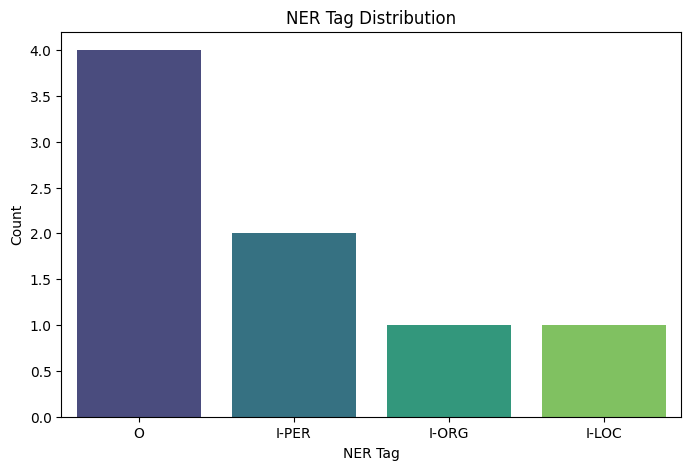

In [131]:
plt.figure(figsize=(8,5))
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")
plt.title("NER Tag Distribution")
plt.xlabel("NER Tag")
plt.ylabel("Count")
plt.show()
